In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get data from CSVs
==================

In this exercise, you'll create a dataframe from a CSV file. The United States makes available CSV files containing tax data by ZIP or postal code, allowing us to analyze income information in different parts of the country. We'll focus on a subset of the data, `vt_tax_data_2016.csv`, which has select tax statistics by ZIP code in Vermont in 2016.

To load the data, you'll need to import the `pandas` library, then read `vt_tax_data_2016.csv` and assign the resulting dataframe to a variable. Then we'll have a look at the data.

Instructions
------------

100 XP

*   Import the `pandas` library as `pd`.
*   Use `read_csv()` to load `vt_tax_data_2016.csv` and assign it to the variable `data`.
*   View the first few lines of the dataframe with the `head()` method. This code has been written for you.
###

In [2]:
# Import pandas as pd
import pandas as pd

# Read the CSV and assign it to the variable data
data = pd.read_csv('vt_tax_data_2016.csv')

# View the first few lines of data
print(data.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

Get data from other flat files
==============================

While CSVs are the most common kind of flat file, you will sometimes find files that use different delimiters. `read_csv()` can load all of these with the help of the `sep` keyword argument. By default, `pandas` assumes that the separator is a comma, which is why we do not need to specify `sep` for CSVs.

The version of Vermont tax data here is a tab-separated values file (TSV), so you will need to use `sep` to pass in the correct delimiter when reading the file. Remember that tabs are represented as `\t`. Once the file has been loaded, the remaining code groups the `N1` field, which contains income range categories, to create a chart of tax returns by income category.

Instructions
------------

100 XP

*   Import `pandas` with the alias `pd`.
*   Load `vt_tax_data_2016.tsv`, making sure to set the correct delimiter with the `sep` keyword argument.

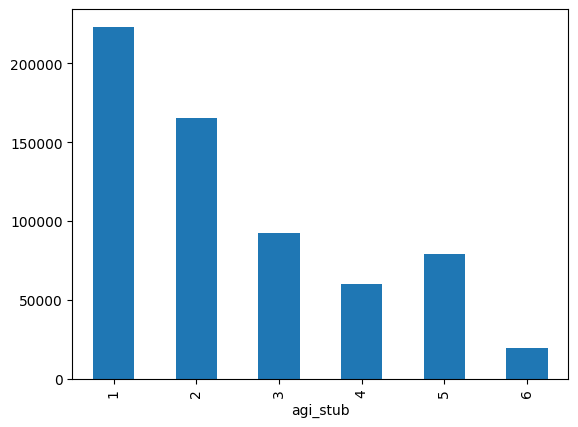

In [9]:
# Import pandas with the alias pd
import pandas as pd

# Load TSV using the sep keyword argument to set delimiter
data = pd.read_csv('vt_tax_data_2016.tsv', sep='\t')

# Plot the total number of tax returns by income group
counts = data.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.show()

Import a subset of columns
==========================

The Vermont tax data contains 147 columns describing household composition, income sources, and taxes paid by ZIP code and income group. Most analyses don't need all these columns. In this exercise, you will create a dataframe with fewer variables using `read_csv()`s `usecols` argument.

Let's focus on household composition to see if there are differences by geography and income level. To do this, we'll need columns on income group, ZIP code, tax return filing status (e.g., single or married), and dependents. The data uses codes for variable names, so the specific columns needed are in the instructions.

`pandas` has already been imported as `pd`.

### Instructions

*   Create a list of columns to use: `zipcode`, `agi_stub` (income group), `mars1` (number of single households), `MARS2` (number of households filing as married), and `NUMDEP` (number of dependents).
*   Create a dataframe from `vt_tax_data_2016.csv` that uses only the selected columns.

In [10]:
# Create list of columns to use
cols = ['zipcode', 'agi_stub', 'mars1', 'MARS2', 'NUMDEP']

# Create dataframe from csv using only selected columns
data = pd.read_csv("vt_tax_data_2016.csv", usecols = cols)

# View counts of dependents and tax returns by income level
print(data.groupby("agi_stub").sum())

          zipcode   mars1  MARS2  NUMDEP
agi_stub                                
1         1439444  170320  28480   52490
2         1439444  104000  37690   64660
3         1439444   39160  45390   47330
4         1439444   11670  44410   37760
5         1439444    7820  67750   60730
6         1439444    1210  16340   16300


Import a file in chunks
=======================

When working with large files, it can be easier to load and process the data in pieces. Let's practice this workflow on the Vermont tax data.

The first 500 rows have been loaded as `vt_data_first500`. You'll get the next 500 rows. To do this, you'll employ several keyword arguments: `nrows` and `skiprows` to get the correct records, `header` to tell `pandas` the data does not have column names, and `names` to supply the missing column names. You'll also want to use the `list()` function to get column names from `vt_data_first500` to reuse.

`pandas` has been imported as `pd`.

### Instructions

*   Use `nrows` and `skiprows` to make a dataframe, `vt_data_next500`, with the next 500 rows.
*   Set the `header` argument so that `pandas` knows there is no header row.
*   Name the columns in `vt_data_next500` by supplying a list of `vt_data_first500`'s columns to the `names` argument.

In [13]:
# Preload
vt_data_first500 = pd.read_csv("vt_tax_data_2016.csv", 
                       		  nrows = 500
							)

# print(vt_data_first500.head())

In [14]:
# Create dataframe of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv("vt_tax_data_2016.csv", 
                       		  nrows = 500,
                       		  skiprows = 500,
                       		  header = None,
                       		  names = list(vt_data_first500)
							)

# View the Vermont dataframes to confirm they're different
print(vt_data_first500.head())
print(vt_data_next500.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

Specify data types
==================

When loading a flat file, `pandas` infers the best data type for each column. Sometimes its guesses are off, particularly for numbers that represent groups or qualities instead of quantities.

Looking at the data dictionary for `vt_tax_data_2016.csv` reveals two such columns. The `agi_stub` column contains numbers that correspond to income categories, and `zipcode` has 5-digit values that should be strings -- treating them as integers means we lose leading 0s, which are meaningful. Let's specify the correct data types with the `dtype` argument.

`pandas` has been imported for you as `pd`.

### Instructions 1/2
*   Load `vt_tax_data_2016.csv` with no arguments and view the dataframe's `dtypes` attribute. Note the data types of `zipcode` and `agi_stub`.

In [15]:
# Load csv with no additional arguments
data = pd.read_csv("vt_tax_data_2016.csv")

# Print the data types
print(data.dtypes)

STATEFIPS     int64
STATE        object
zipcode       int64
agi_stub      int64
N1            int64
              ...  
A85300        int64
N11901        int64
A11901        int64
N11902        int64
A11902        int64
Length: 147, dtype: object


### Instructions 2/2

*   Create a dictionary, `data_types`, specifying that `agi_stub` is `"category"` data and `zipcode` is string data.
*   Reload the CSV with the `dtype` argument and the dictionary to set the correct column data types.
*   View the dataframe's `dtypes` attribute.

In [16]:
# Create dict specifying data types for agi_stub and zipcode
data_types = {'agi_stub': 'category',
			  'zipcode': str}

# Load csv using dtype to set correct data types
data = pd.read_csv("vt_tax_data_2016.csv", dtype = data_types)

# Print data types of resulting frame
print(data.dtypes.head())

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
dtype: object


Set custom NA values
====================

Part of data exploration and cleaning consists of checking for missing or NA values and deciding how to account for them. This is easier when missing values are treated as their own data type. and there are `pandas` functions that specifically target such NA values. `pandas` automatically treats some values as missing, but we can pass additional NA indicators with the `na_values` argument. Here, you'll do this to ensure that invalid ZIP codes in the Vermont tax data are coded as NA.

`pandas` has been imported as `pd`.

### Instructions

*   Create a dictionary, `null_values`, specifying that `0`s in the `zipcode` column should be considered NA values.
*   Load `vt_tax_data_2016.csv`, using the `na_values` argument and the dictionary to make sure invalid ZIP codes are treated as missing.

In [17]:
# Create dict specifying that 0s in zipcode are NA values
null_values = {'zipcode' : 0}

# Load csv using na_values keyword argument
data = pd.read_csv("vt_tax_data_2016.csv", 
                   na_values = null_values)

# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT      NaN         1  111580  85090  14170  10740  45360   
1         50    VT      NaN         2   82760  51960  18820  11310  35600   
2         50    VT      NaN         3   46270  19540  22650   3620  24140   
3         50    VT      NaN         4   30070   5830  22190    960  16060   
4         50    VT      NaN         5   39530   3900  33800    590  22500   
5         50    VT      NaN         6    9620    600   8150      0   7040   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   
5   26430  ...  

Skip bad data
=============

In this exercise you'll use `read_csv()` parameters to handle files with bad data, like records with more values than columns. By default, trying to import such files triggers a specific error, `pandas.errors.ParserError`.

Some lines in the Vermont tax data here are corrupted. In order to load the good lines, we need to tell `pandas` to skip errors. We also want `pandas` to warn us when it skips a line so we know the scope of data issues.

`pandas` has been imported as `pd`. The exercise code will try to read the file. If there is a `pandas.errors.ParserError`, the code in the `except` block will run.

### Instructions 1/3

*   Try to import the file `vt_tax_data_2016_corrupt.csv` without any keyword arguments.



In [25]:
try:
  # Import the CSV without any keyword arguments
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv")
  # View first 5 records
  print(data.head())
  
except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

  STATEFIPS STATE  zipcode agi_stub        N1    mars1    MARS2    MARS4  \
0        50    VT      0.0        1  111580.0  85090.0  14170.0  10740.0   
1        50    VT      0.0        2   82760.0  51960.0  18820.0  11310.0   
2        50    VT      0.0        3   46270.0  19540.0  22650.0   3620.0   
3        50    VT      0.0                4.0  30070.0   5830.0  22190.0   
4        50    VT      0.0        5   39530.0   3900.0  33800.0    590.0   

      PREP      N2  ...    A10300    N85530  A85530  N85300  A85300   N11901  \
0  45360.0  130630  ...   50699.0       0.0     0.0     0.0     0.0  10820.0   
1  35600.0  132950  ...  221146.0       0.0     0.0     0.0     0.0  12820.0   
2  24140.0   91870  ...  266097.0       0.0     0.0     0.0     0.0  10810.0   
3    960.0   16060  ...   29580.0  264678.0     0.0     0.0     0.0      0.0   
4  22500.0  103710  ...  731963.0      40.0    24.0     0.0     0.0  12500.0   

    A11901   N11902  A11902]  Unnamed: 147  
0   9734.0  88260

### Instructions 2/3
    
*   Import `vt_tax_data_2016_corrupt.csv` with the `error_bad_lines` parameter set to skip bad records.



In [24]:
try:
    # Import CSV with error_bad_lines set to skip bad records
    
    data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
                        on_bad_lines = 'skip')

    # For pandas 1.4.0
    # The error_bad_lines argument from Pandas read_csv is deprecated. So you should use the on_bad_lines argument instead.

    # data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
    #                     error_bad_lines=False)
    
    # View first 5 records
    print(data.head())
    
except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

  STATEFIPS STATE  zipcode agi_stub        N1    mars1    MARS2    MARS4  \
0        50    VT      0.0        1  111580.0  85090.0  14170.0  10740.0   
1        50    VT      0.0        2   82760.0  51960.0  18820.0  11310.0   
2        50    VT      0.0        3   46270.0  19540.0  22650.0   3620.0   
3        50    VT      0.0                4.0  30070.0   5830.0  22190.0   
4        50    VT      0.0        5   39530.0   3900.0  33800.0    590.0   

      PREP      N2  ...    A10300    N85530  A85530  N85300  A85300   N11901  \
0  45360.0  130630  ...   50699.0       0.0     0.0     0.0     0.0  10820.0   
1  35600.0  132950  ...  221146.0       0.0     0.0     0.0     0.0  12820.0   
2  24140.0   91870  ...  266097.0       0.0     0.0     0.0     0.0  10810.0   
3    960.0   16060  ...   29580.0  264678.0     0.0     0.0     0.0      0.0   
4  22500.0  103710  ...  731963.0      40.0    24.0     0.0     0.0  12500.0   

    A11901   N11902  A11902]  Unnamed: 147  
0   9734.0  88260

### Instructions 3/3
    
*   Update the import with the `warn_bad_lines` parameter set to issue a warning whenever a bad record is skipped.
    

In [29]:
try:
  # Set warn_bad_lines to issue warnings about bad records
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
                    on_bad_lines = 'warn')
  
  # View first 5 records
  print(data.head())
  
except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

  STATEFIPS STATE  zipcode agi_stub        N1    mars1    MARS2    MARS4  \
0        50    VT      0.0        1  111580.0  85090.0  14170.0  10740.0   
1        50    VT      0.0        2   82760.0  51960.0  18820.0  11310.0   
2        50    VT      0.0        3   46270.0  19540.0  22650.0   3620.0   
3        50    VT      0.0                4.0  30070.0   5830.0  22190.0   
4        50    VT      0.0        5   39530.0   3900.0  33800.0    590.0   

      PREP      N2  ...    A10300    N85530  A85530  N85300  A85300   N11901  \
0  45360.0  130630  ...   50699.0       0.0     0.0     0.0     0.0  10820.0   
1  35600.0  132950  ...  221146.0       0.0     0.0     0.0     0.0  12820.0   
2  24140.0   91870  ...  266097.0       0.0     0.0     0.0     0.0  10810.0   
3    960.0   16060  ...   29580.0  264678.0     0.0     0.0     0.0      0.0   
4  22500.0  103710  ...  731963.0      40.0    24.0     0.0     0.0  12500.0   

    A11901   N11902  A11902]  Unnamed: 147  
0   9734.0  88260

Well done! Flat files are just the beginning when it comes to data ingestion. In the next chapters, you'll learn how to automate data imports from other sources, plus more ways to fine-tune imports. A note about this exercise: the exercise console doesn't usually display warnings, so this exercise uses a slightly modified version of `read_csv()` that prints warnings, just like you would see if you ran the code in a local environment.